# DEMO 5

Evaluating the Performance of our Strategy

In [1]:
import sys
import os
# Manually set the path relative to the py file's location that you want to import
func_lib_path = os.path.abspath(os.path.join(os.getcwd(), '../'))

# Add the path to sys.path
sys.path.append(func_lib_path)

# Now you can import func_lib
import func_lib
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
historical_prices = func_lib.createHistPrices()
list_of_momentums = [1]
total_returns     = func_lib.computingReturns(historical_prices, list_of_momentums)
total_returns.dropna(inplace=True)

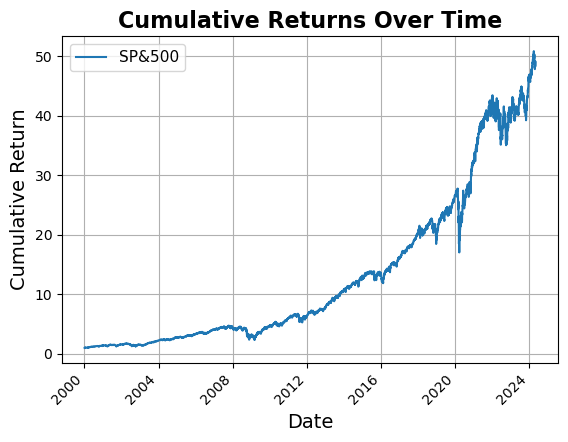

The CAGR is: 17.27%
Sharpe Ratio of Strategy: 0.89


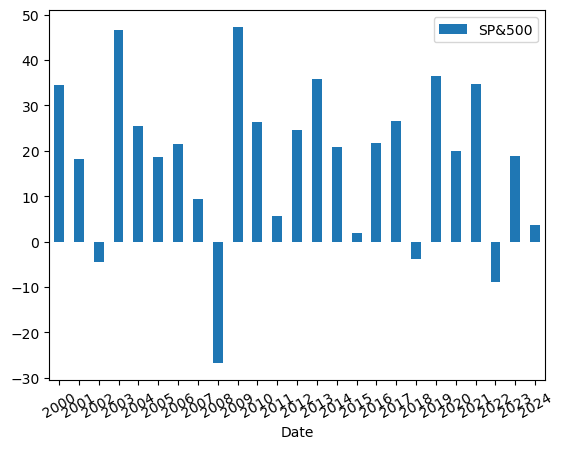

In [3]:
cum_returns, calendar_returns  = func_lib.compute_BM_Perf(total_returns)

In [4]:
# Calculate RSI for each ticker separately and add to the DataFrame
total_returns['RSI'] = total_returns.groupby('Ticker')[['1_d_returns']].transform(func_lib.calculate_rsi)

In [5]:
total_returns.head()

F_1_d_returns  1_d_returns  RSI
Ticker Date                                       
A      2000-01-04      -0.062030    -0.076389  NaN
       2000-01-05      -0.038076    -0.062030  NaN
       2000-01-06       0.083334    -0.038076  NaN
       2000-01-07       0.060577     0.083334  NaN
       2000-01-10      -0.013599     0.060577  NaN

In [ ]:
def compute_strat_perf(total_returns, cum_returns, calendar_returns, trading_strategy, model_name):    
    return cum_returns, calendar_returns

In [7]:
# Define trading strategy based on RSI
def trading_strategy(rsi):
    if rsi < 30:
        return  1 # Go long
    else:
        return 0
model_name = "RSI"

In [8]:
# Apply trading strategy to each RSI value
total_returns['Position'] = total_returns[model_name].transform(trading_strategy)

In [9]:
total_returns.head()

F_1_d_returns  1_d_returns  RSI  Position
Ticker Date                                                 
A      2000-01-04      -0.062030    -0.076389  NaN         0
       2000-01-05      -0.038076    -0.062030  NaN         0
       2000-01-06       0.083334    -0.038076  NaN         0
       2000-01-07       0.060577     0.083334  NaN         0
       2000-01-10      -0.013599     0.060577  NaN         0

In [10]:
# Create Returns for each Trade
total_returns[f'{model_name}_Return'] = total_returns['F_1_d_returns'] *  total_returns['Position'] 
total_returns.head()

F_1_d_returns  1_d_returns  RSI  Position  RSI_Return
Ticker Date                                                             
A      2000-01-04      -0.062030    -0.076389  NaN         0        -0.0
       2000-01-05      -0.038076    -0.062030  NaN         0        -0.0
       2000-01-06       0.083334    -0.038076  NaN         0         0.0
       2000-01-07       0.060577     0.083334  NaN         0         0.0
       2000-01-10      -0.013599     0.060577  NaN         0        -0.0

In [11]:
# Compute the daily mean of all stocks. This will be our equal weighted benchmark
daily_mean  = pd.DataFrame(total_returns.loc[:,f'{model_name}_Return'].groupby(level='Date').mean())

In [12]:
# Convert daily returns to cumulative returns
cum_returns.loc[:,f'{model_name}_Return']  = pd.DataFrame((daily_mean[[f'{model_name}_Return']]+1).cumprod())

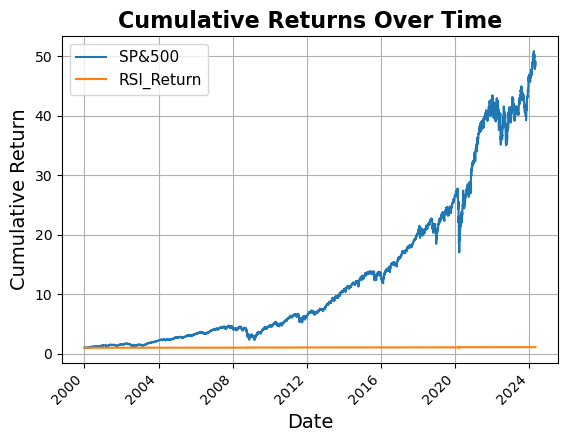

In [13]:
# Plotting the cumulative returns
cum_returns.plot()

# Customizing the plot
plt.title('Cumulative Returns Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title_fontsize='13', fontsize='11')

# Display the plot
plt.show()

In [14]:
# Calculate the number of years in the dataset
number_of_years = len(daily_mean) / 252  # Assuming 252 trading days in a year

ending_value    = cum_returns[f'{model_name}_Return'].iloc[-1]
beginning_value = cum_returns[f'{model_name}_Return'].iloc[1]

ratio = ending_value/beginning_value
# Compute the Compound Annual Growth Rate (CAGR)
cagr = round((ratio**(1/number_of_years)-1)*100,2)

print(f'The CAGR is: {cagr}%')

The CAGR is: 0.42%


In [15]:
# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
average_daily_return  = daily_mean[[f'{model_name}_Return']].describe().iloc[1,:] * 252
stand_dev_dail_return   = daily_mean[[f'{model_name}_Return']].describe().iloc[2,:] * pow(252,1/2)

# Compute the Sharpe Ratio and print it out
sharpe  = average_daily_return/stand_dev_dail_return

print(f'Sharpe Ratio of Strategy: {round(sharpe.iloc[0],2)}')

Sharpe Ratio of Strategy: 0.37


<Axes: xlabel='Date'>

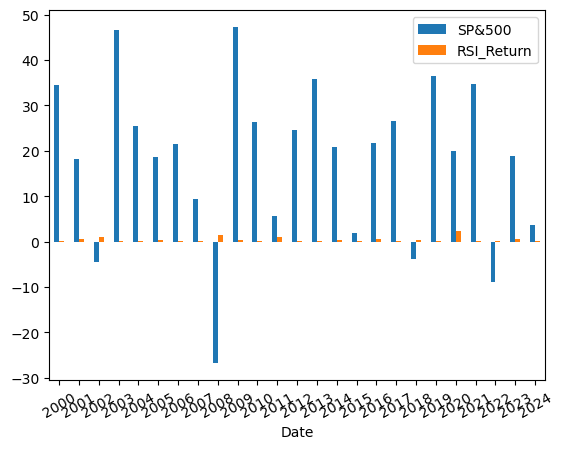

In [16]:
ann_returns = (pd.DataFrame((daily_mean[f'{model_name}_Return']+1).groupby(daily_mean.index.get_level_values(0).year).cumprod())-1)*100

calendar_returns.loc[:,f'{model_name}_Return']  = pd.DataFrame(ann_returns[f'{model_name}_Return'].groupby(daily_mean.index.get_level_values(0).year).last())

calendar_returns.plot.bar(rot=30,  legend='top_left')#.opts(multi_level=False) 

In [17]:
trades = total_returns[total_returns['Position']==1]
tickers_per_date =trades.index.get_level_values('Date').value_counts()
tickers_per_date.describe()

count    4534.000000
mean        3.470666
std         5.070768
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       111.000000
Name: count, dtype: float64

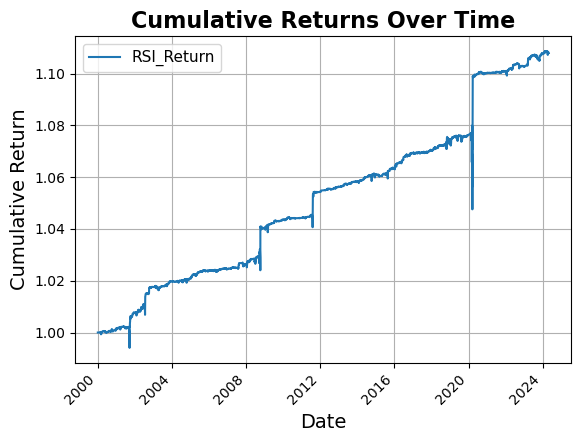

In [18]:
# Plotting the cumulative returns
cum_returns['RSI_Return'].plot()

# Customizing the plot
plt.title('Cumulative Returns Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title_fontsize='13', fontsize='11')

# Display the plot
plt.show()